In [ ]:
#0: Importar bibliotecas


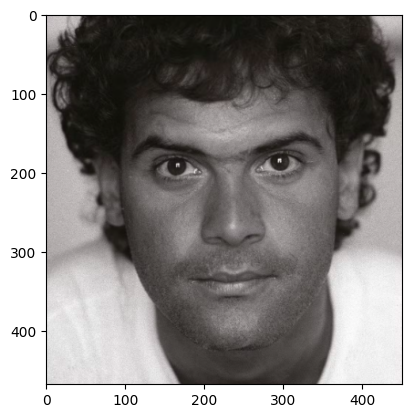

In [ ]:

# 1: Faça upload da sua imagem do cazuza


# 2: Criar variável da imagem e converter em RGB

#3: Exiba a imagem



In [ ]:
# 4: Faça upload do arquivo da dlib, crie as variaveis de detector e predictor

# 5: Detectar faces


1


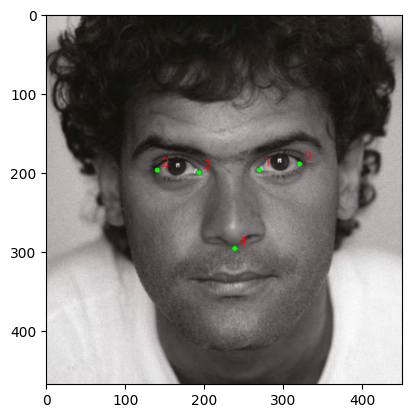

In [ ]:
# 6: Desenhar os 5 pontos


# 7: Mostrar imagem com landmarks


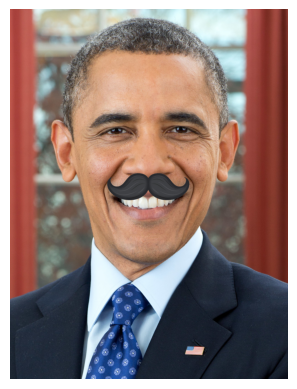

In [ ]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

# Carregar detector de faces e shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")

# Carregar imagem
imagem = cv2.imread("obama.png")
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Carregar bigode PNG com transparência
bigode = cv2.imread("bigode.png", cv2.IMREAD_UNCHANGED)

# Detectar faces
faces = detector(imagem_rgb)

for face in faces:
    landmarks = predictor(imagem_rgb, face)

    # Ponto do nariz
    x_boca_dir = landmarks.part(4).x
    y_boca_dir = landmarks.part(4).y

    # Calcular largura do bigode proporcional à face
    face_width = face.right() - face.left()
    bigode_width = int(face_width * 0.6)
    scale = bigode_width / bigode.shape[1]
    bigode_height = int(bigode.shape[0] * scale)

    # Redimensionar bigode
    bigode_resized = cv2.resize(bigode, (bigode_width, bigode_height))

    # Posicionar bigode centralizado horizontalmente no ponto 4 e verticalmente acima
    x1 = x_boca_dir - bigode_width // 2
    y1 = y_boca_dir - int(bigode_height * 0.4)
    x2 = x1 + bigode_width
    y2 = y1 + bigode_height

    # Ajustar limites da imagem
    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(imagem_rgb.shape[1], x2)
    y2 = min(imagem_rgb.shape[0], y2)

    # Redimensionar novamente se necessário
    roi_width = x2 - x1
    roi_height = y2 - y1
    bigode_resized = cv2.resize(bigode_resized, (roi_width, roi_height))

    # Aplicar bigode usando alpha
    if bigode_resized.shape[2] == 4:
        alpha = bigode_resized[:, :, 3] / 255.0
        for c in range(3):
            imagem_rgb[y1:y2, x1:x2, c] = (
                alpha * bigode_resized[:, :, c] + (1 - alpha) * imagem_rgb[y1:y2, x1:x2, c]
            )

# Mostrar resultado
plt.imshow(imagem_rgb)
plt.axis("off")
plt.show()
